In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [2]:
%%time

fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
year = 2016
cat = 2


# path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p7/MC_Summer16/v11/v9/'
path = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_7/src/cms_lpc_llp/llp_ntupler/'


bkg_path = path+"/bkg/wH/normalized/"
# greater than one lepton, lepton 27 GeV cut, greater than 2 jets

# fpath_bkg['QCD'] = bkg_path+"QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['DYJetsToLL'] = bkg_path+"DYJetsToLL_M-50_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_DiLept'] = bkg_path+"TTJets_DiLept_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_SingleLeptFromTbar'] = bkg_path+"TTJets_SingleLeptFromTbar_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['TTJets_SingleLeptFromT'] = bkg_path+"TTJets_SingleLeptFromT_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"

# fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu'] = bkg_path+"WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu_Pt100to250'] = bkg_path+"WJetsToLNu_Pt-100To250_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu_Pt250to400'] = bkg_path+"WJetsToLNu_Pt-250To400_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu_Pt600to600'] = bkg_path+"WJetsToLNu_Pt-400To600_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"
# fpath_bkg['WJetsToLNu_Pt600toInf'] = bkg_path+"WJetsToLNu_Pt-600ToInf_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8_1pb_weighted.root"

# fpath_bkg['ZJetsToNuNu'] = bkg_path+"ZJetsToNuNu_Zpt-100toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root"

start_t = time.time()

sig_path = path
# fpath_bkg['bbbb10m'] = sig_path + 'WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root'
# fpath_bkg['bbbb1m'] = sig_path + 'WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-1000_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root'
# fpath_bkg['bbbb55'] = sig_path + 'ZH_HToSSTobbbb_ZToLL_MH-125_MS-55_ctauS-1000_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root'
fpath_bkg['bbbb10m'] = sig_path + '/displacedJetMuon_ntupler_v4.root'



# fpath_bkg['bbbb0.1m'] = sig_path + 'WH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-100_TuneCUETP8M1_13TeV-powheg-pythia8_1pb_weighted.root'

if year == 2016:lumi = 35.92*1000 #in pb-1
elif year == 2017:lumi = 41.53 * 1000
else: lumi = 59.74 * 1000
    

NEvents = {}


for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 

    tree_bkg[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["gLLP_csc"].array()
    print(len(a))



bbbb10m /storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_7/src/cms_lpc_llp/llp_ntupler//displacedJetMuon_ntupler_v4.root
140481
CPU times: user 274 ms, sys: 11.8 ms, total: 286 ms
Wall time: 282 ms


# legend

In [3]:

legend = {}
legend['bbbb10m'] = 'signal c#tau = 10 m'
legend['bbbb1m'] = 'signal c#tau = 1 m'
legend['bbbb0.1m'] = 'signal c#tau = 0.1 m'

legend['DYJetsToLL'] = 'DYJetsToLL'
legend['WJetsToLNu'] = 'WJetsToLNu'

# Helper Functions

In [4]:
import math
def deltaPhi( phi1,  phi2):

    dphi = phi1-phi2
    while (dphi > math.pi):
        dphi -= 2*math.pi
  
    while (dphi <= -math.pi):
        dphi += 2*math.pi
    return dphi
def deltaR(eta1, phi1, eta2, phi2):
    dphi = deltaPhi(phi1,phi2)
    deta = eta1 - eta2
    return (dphi*dphi + deta*deta)**0.5

# Load variables

In [3]:
%%time

JET_PT_CUT = 10
MUON_PT_CUT = 20
gLLP_csc = {}
nCscWireDigis = {}
nCscStripDigis = {}
nCscSimHits = {}
nCscRecHits = {}
nCscRecHits_seg = {}
cscDetLayer_nCscRecHits = {}
cscDetLayer_nCscSimHits = {}
cscDetLayer_nWireDigis = {}
cscDetLayer_nStripDigis = {}
cscDetLayer_inME1112 = {}
cscDetLayer = {}

cscSimHitsX = {}
cscSimHitsY = {}
cscSimHitsZ = {}
cscRecHitsX = {}
cscRecHitsY = {}
cscRecHitsZ = {}
cscRecHitsDetId = {}


cscSimHitsDetId = {}
cscSimHitsParticleType = {}
cscSimHitsEnergyLoss = {}
gLLP_decay_vertex_x = {}
gLLP_decay_vertex_y = {}
gLLP_decay_vertex_z = {}
eventNum = {}
cscDetLayer_maxindex = {}

nCscWireDigiSimLink = {}
cscWireDigiSimLinkNWires = {}
nCscWireOccupancy = {}
cscWireDigiSimLinkMaxOccupancy = {}


nCscStripDigiSimLink = {}
cscStripDigiSimLinkNStrips = {}
nCscStripOccupancy = {}
cscStripDigiSimLinkMaxOccupancy = {}
for k,T in tree_bkg.items():
    # if there's at least one LLP decay in csc
    gLLP_csc[k] = np.sum(T.array('gLLP_csc'),axis=1)
    gLLP_decay_vertex_x[k] = T.array('gLLP_decay_vertex_x')
    gLLP_decay_vertex_y[k] = T.array('gLLP_decay_vertex_y')
    gLLP_decay_vertex_z[k] = T.array('gLLP_decay_vertex_z')
    nCscWireDigis[k] = T.array('nCscWireDigis')
    nCscStripDigis[k] = T.array('nCscStripDigis')
    nCscSimHits[k] = T.array('nCscSimHits')
    nCscRecHits[k] = T.array('nCscRecHits')
    nCscRecHits_seg[k] = T.array('cscSegNRecHits').sum()
    print(T.array('cscSegNRecHits'))
    
    cscSimHitsX[k] = T.array('cscSimHitsX')
    cscSimHitsY[k] = T.array('cscSimHitsY')
    cscSimHitsZ[k] = T.array('cscSimHitsZ')

    cscRecHitsX[k] = T.array('cscRecHitsX')
    cscRecHitsY[k] = T.array('cscRecHitsY')
    cscRecHitsZ[k] = T.array('cscRecHitsZ')
    cscRecHitsDetId[k] = T.array('cscRecHitsDetId')
    cscSimHitsEnergyLoss[k] = T.array('cscSimHitsEnergyLoss').sum()
    cscSimHitsDetId[k] = T.array('cscSimHitsDetId')
    cscSimHitsParticleType[k] = T.array('cscSimHitsParticleType')
    
    
    nCscWireDigiSimLink[k] = T.array('nCscWireDigiSimLink')
    cscWireDigiSimLinkNWires[k] = T.array('cscWireDigiSimLinkNWires')
    nCscWireOccupancy[k] = 1.0*nCscWireDigiSimLink[k]/cscWireDigiSimLinkNWires[k]
    
    nCscStripDigiSimLink[k] = T.array('nCscStripDigiSimLink')
    cscStripDigiSimLinkNStrips[k] = T.array('cscStripDigiSimLinkNStrips')
    nCscStripOccupancy[k] = 1.0*nCscStripDigiSimLink[k]/cscStripDigiSimLinkNStrips[k]
    
    cscWireDigiSimLinkMaxOccupancy[k]  = T.array('cscWireDigiSimLinkOccupancy').max()
    cscStripDigiSimLinkMaxOccupancy[k]  = T.array('cscStripDigiSimLinkOccupancy').max()


    
#     nCscDetLayer
    cscDetLayer_inME1112[k] = T.array('cscDetLayer_inME1112')
    cscDetLayer_nCscRecHits[k] = T.array('cscDetLayer_nCscRecHits')[np.logical_not(cscDetLayer_inME1112[k])]
    cscDetLayer_nCscSimHits[k] = T.array('cscDetLayer_nCscSimHits')[np.logical_not(cscDetLayer_inME1112[k])]
    cscDetLayer_nWireDigis[k] = T.array('cscDetLayer_nWireDigis')[np.logical_not(cscDetLayer_inME1112[k])]
    cscDetLayer_nStripDigis[k] = T.array('cscDetLayer_nStripDigis')[np.logical_not(cscDetLayer_inME1112[k])]
    cscDetLayer[k] =  T.array('cscDetLayer')[np.logical_not(cscDetLayer_inME1112[k])]
#     print( T.array('cscDetLayer_nCscRecHits'))
    
    
    # to plot simhits distribution
    eventNum[k] = T.array('eventNum')
    cscDetLayer_maxindex[k] = cscDetLayer_nCscSimHits[k].argmax()

#     for i,ev in enumerate(eventNum[k]):
#         if len(cscDetLayer_nCscSimHits[k][i]) == 0: continue
#         max_index = np.argmax(cscDetLayer_nCscSimHits[k][i])
        
# #         muons = np.count_nonzero(np.logical_and(np.abs(cscSimHitsParticleType[k][i]) == 13, cscSimHitsDetId[k][i] == cscDetLayer_nCscSimHits[k][i][max_index]))
# #         if muons>0:
#         if cscDetLayer_nCscSimHits[k][i][max_index]<30 and cscDetLayer_nCscSimHits[k][i][max_index]>10 and gLLP_csc[k][i] == 1:
#             print(ev,cscDetLayer[k][i][max_index],cscDetLayer_nCscSimHits[k][i][max_index], cscDetLayer_nCscRecHits[k][i][max_index],nCscSimHits[k][i], nCscRecHits[k][i],gLLP_csc[k][i])


    
    
#     print(cscDetLayer_nCscSimHits[k].max())
#     np.amax(
#         cscDetLayer_nCscSimHits[k].max(), axis = 1)

[[6 3] [6 6 6 ... 6 6 4] [6] ... [6 6 6 ... 3 3 5] [3 3 6 4 3] [6 3 6 4 6]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


CPU times: user 17.5 s, sys: 1.01 s, total: 18.5 s
Wall time: 18.1 s


# 1D histogram

0.006514310836791992


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb10m (Potential memory leak).


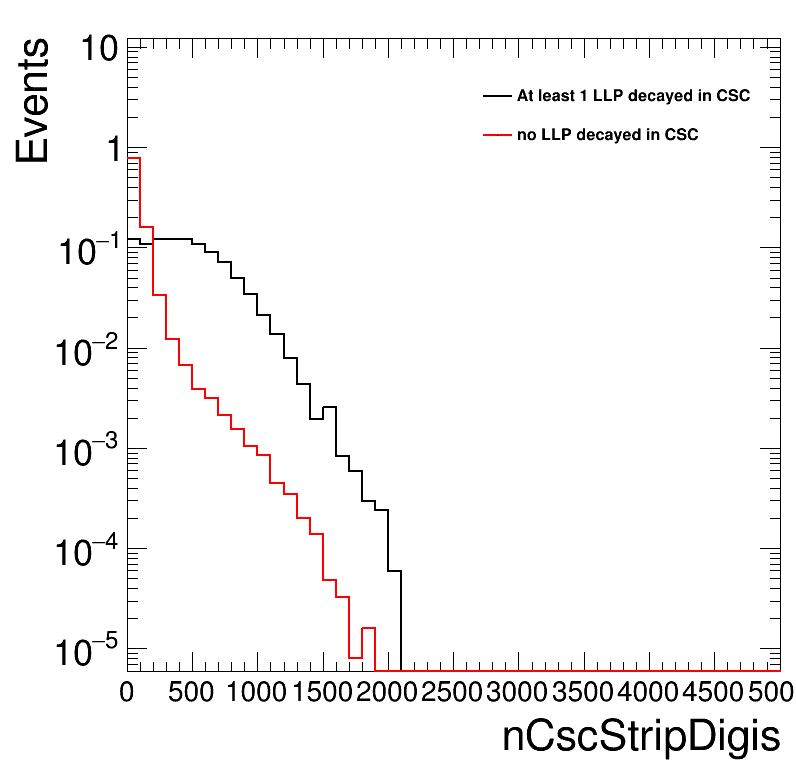

In [71]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 800, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.60,0.80,0.80,0.90)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)
maximum = 0

variables = [nCscSimHits, nCscRecHits, nCscWireDigis, nCscStripDigis]
names = ['nCscSimHits', 'nCscRecHits', 'nCscWireDigis', 'nCscStripDigis']
bins = [[75,0,4000],[75,0,4000],[50,0,800],[50,0,5000]]


for i, k in enumerate(tree_bkg.keys()):
    cond = gLLP_csc[k]
#     cond = np.logical_not(gLLP_csc[k])
    #nWireDigis
#     bins = [50,0,800]
#     h[k] = create_TH1D( nCscWireDigis[k][cond], axis_title=['nCscWireDigis', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( nCscWireDigis[k][np.logical_not(cond)], axis_title=['nCscWireDigis', 'Events'], name=k, binning=bins)

#     #nStripDigis
    bins = [50,0,5000]
    h[k] = create_TH1D( cscStripDigiSimLinkNStrips[k][cond >= 1], axis_title=['nCscStripDigis', 'Events'], name=k, binning=bins)
    h[k+'not'] = create_TH1D( cscStripDigiSimLinkNStrips[k][np.logical_not(cond)], axis_title=['nCscStripDigis', 'Events'], name=k, binning=bins)
#     print(nCscStripDigis[k][np.logical_not(cond)])
    
#     #nSimHits
#     bins = [75,0,4000]
#     h[k] = create_TH1D( nCscSimHits[k][cond], axis_title=['nCscSimHits', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( nCscSimHits[k][np.logical_not(cond)], axis_title=['nCscSimHits', 'Events'], name=k, binning=bins)

#     #nRecHits
#     bins = [75,0,4000]
#     h[k] = create_TH1D( nCscRecHits[k][cond], axis_title=['nCscRecHits', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( nCscRecHits[k][np.logical_not(cond)], axis_title=['nCscRecHits', 'Events'], name=k, binning=bins)
    #     #nRecHits
#     bins = [75,0,500]
#     h[k] = create_TH1D( nCscRecHits_seg[k][cond >=1 ], axis_title=['nCscRecHits', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( nCscRecHits_seg[k][cond == 0], axis_title=['nCscRecHits', 'Events'], name=k, binning=bins)
#     print(nCscRecHits_seg[k])
#     #     #number of rechits per layer
#     bins = [50,0,500]
#     h[k] = create_TH1D( cscSimHitsEnergyLoss[k][cond >=1 ]*10000, axis_title=['Energy loss', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscSimHitsEnergyLoss[k][cond == 0]*10000, axis_title=['Energy loss', 'Events'], name=k, binning=bins)
#     print(cscSimHitsEnergyLoss[k])

    
    
#     #number of wiredigis per layer
#     bins = [50,0,100]
#     cond = cscDetLayer_nWireDigis[k]*0+cond
#     cond = cond.flatten()
#     h[k] = create_TH1D( cscDetLayer_nWireDigis[k].flatten()[cond >=1 ], axis_title=['nCscWireDigis per Layer', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscDetLayer_nWireDigis[k].flatten()[cond == 0], axis_title=['nCscWireDigis per Layer', 'Events'], name=k, binning=bins)

    #number of stripdigis per layer
#     bins = [50,0,100]
#     cond = cscDetLayer_nStripDigis[k]*0+cond
#     cond = cond.flatten()
#     h[k] = create_TH1D( cscDetLayer_nStripDigis[k].flatten()[cond ==1 ], axis_title=['nCscStripDigis per Layer', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscDetLayer_nStripDigis[k].flatten()[cond == 0], axis_title=['nCscStripDigis per Layer', 'Events'], name=k, binning=bins)

#     #number of max wiredigis
#     bins = [50,0,100]
#     h[k] = create_TH1D( cscDetLayer_nWireDigis[k][cond >=1 ], axis_title=['Max WireDigi per Layer', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscDetLayer_nWireDigis[k][cond == 0], axis_title=['Max WireDigi per Layer', 'Events'], name=k, binning=bins)

#     #number of max strip
#     bins = [50,0,100]
#     h[k] = create_TH1D( cscDetLayer_nStripDigis[k][cond >=1 ], axis_title=['Max StripDigi per Layer', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscDetLayer_nStripDigis[k][cond == 0], axis_title=['Max StripDigi per Layer', 'Events'], name=k, binning=bins)

#     #number of simhits per layer
#     bins = [50,0,800]
# #     cond = cscDetLayer_nCscRecHits[k]*0+cond
# #     cond = cond.flatten()
# #     h[k] = create_TH1D( cscDetLayer_nCscSimHits[k].flatten()[cond >=1 ], axis_title=['nCscSimHits per Layer', 'Events'], name=k, binning=bins)
# #     h[k+'not'] = create_TH1D( cscDetLayer_nCscSimHits[k].flatten()[cond == 0], axis_title=['nCscSimHits per Layer', 'Events'], name=k, binning=bins)
#     h[k] = create_TH1D( cscDetLayer_nCscSimHits[k].max()[cond >=1 ], axis_title=['nCscSimHits per Layer', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscDetLayer_nCscSimHits[k].max()[cond == 0], axis_title=['nCscSimHits per Layer', 'Events'], name=k, binning=bins)
#     temp = np.count_nonzero(cscDetLayer_nCscSimHits[k].max()[cond >=1 ]<=100)/len(cscDetLayer_nCscSimHits[k].max()[cond >=1 ])
#     print(temp)
#     #number of rechits per layer
#     bins = [50,0,500]
#     cond = cscDetLayer_nCscRecHits[k]*0+cond
#     cond = cond.flatten()
#     h[k] = create_TH1D( cscDetLayer_nCscRecHits[k].flatten()[cond >=1 ], axis_title=['nCscRecHits per Layer', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscDetLayer_nCscRecHits[k].flatten()[cond == 0], axis_title=['nCscRecHits per Layer', 'Events'], name=k, binning=bins)

# #     #number of nCscStripAvgOccupancy
#     bins = [100,0,100]
#     h[k] = create_TH1D( nCscStripOccupancy[k][cond >=1 ], axis_title=['CscStrip Digi Avg Occupancy', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( nCscStripOccupancy[k][cond == 0], axis_title=['CscStrip Digi Avg Occupancy', 'Events'], name=k, binning=bins)

    # #     #number of nCscStripMaxOccupancy
#     bins = [200,0,200]
#     h[k] = create_TH1D( cscStripDigiSimLinkMaxOccupancy[k][cond >=1 ], axis_title=['CscStrip Digi Max Occupancy', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscStripDigiSimLinkMaxOccupancy[k][cond == 0], axis_title=['CscStrip Digi Max Occupancy', 'Events'], name=k, binning=bins)




# #     #number of nCscWireOccupancy
#     bins = [30,0,30]
#     h[k] = create_TH1D( nCscWireOccupancy[k][cond >=1 ], axis_title=['CscWire Digi Avg Occupancy', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( nCscWireOccupancy[k][cond == 0], axis_title=['CscWire Digi Avg Occupancy', 'Events'], name=k, binning=bins)


#     # #     #number of nCscWireMaxOccupancy
#     bins = [200,0,200]
#     h[k] = create_TH1D( cscWireDigiSimLinkMaxOccupancy[k][cond >=1 ], axis_title=['CscWire Digi Max Occupancy', 'Events'], name=k, binning=bins)
#     h[k+'not'] = create_TH1D( cscWireDigiSimLinkMaxOccupancy[k][cond == 0], axis_title=['CscWire Digi Max Occupancy', 'Events'], name=k, binning=bins)







    
    
    h[k].SetLineColor(std_color_list[i])
    h[k+'not'].SetLineColor(std_color_list[i+1])


    leg.AddEntry(h[k], 'At least 1 LLP decayed in CSC')
    leg.AddEntry(h[k+'not'], 'no LLP decayed in CSC')
    h[k].SetMinimum(0.1)
    maximum = max(maximum, h[k].GetMaximum() )
    h[k].SetMaximum(maximum * 100)
    h[k].GetXaxis().SetLabelSize(0.04)
    h[k].DrawNormalized('same hist')
    h[k+'not'].DrawNormalized('same hist')



#     h[k].GetXaxis()


    i+=1
leg.Draw()


# if setlog: 
c.SetLogy()
c.Draw()
print(time.time()-start_t)

In [ ]:
# ROC Curve

(394,) (394,)
sig nCscRecHits_seg 20.68517898962864
116
(1000,) (1000,)
sig nCscRecHits 145.99291617473435
570


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


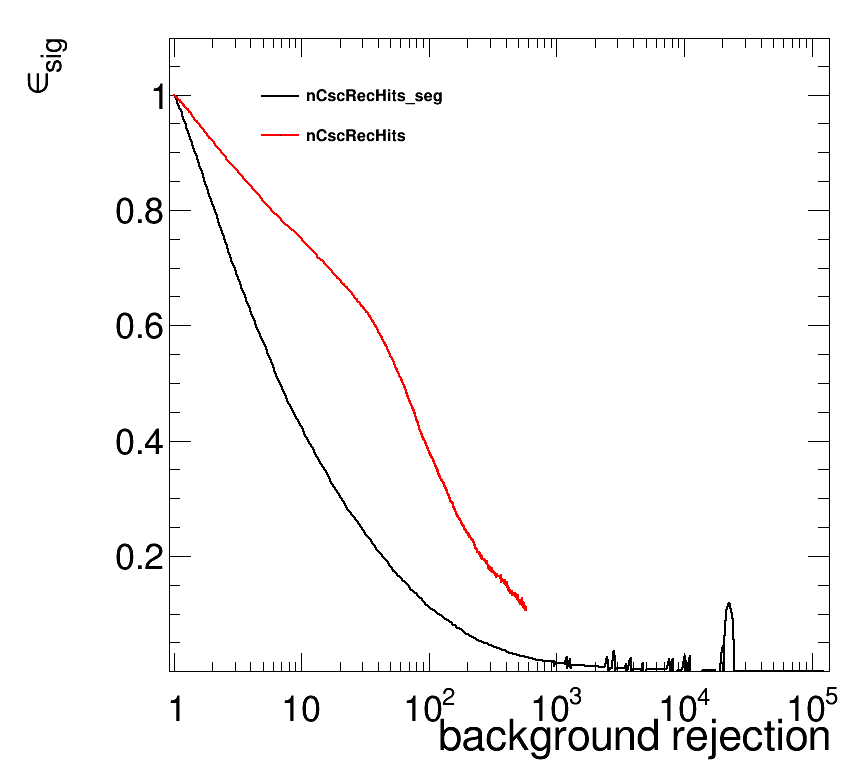

In [16]:
#ROC curve
c = rt.TCanvas('c','c', 850, 800)
leg = rt.TLegend(0.5,0.80,0.85,0.90)
leg = rt.TLegend(0.3,0.80,0.55,0.90)


leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
gr = {}

var = [nCscRecHits_seg, nCscRecHits,]
name =['nCscRecHits_seg', 'nCscRecHits', ]
label = ['nCscRecHits_seg', 'nCscRecHits',]
cond = [gLLP_csc[k]>=1, gLLP_csc[k] == 0]

qcd_key = 'DYJetsToLL'
thre = np.array(range(1000))
k = 'bbbb10m'
for i in range(len(var)):
    eff = {}
    eff['sig'] = []
    eff['bkg'] = []
        
    for th in thre:
        eff['sig'].append(1.0*np.count_nonzero(var[i][k][cond[0]]>th)/len(var[i][k][cond[0]]))
        eff['bkg'].append(1.0*np.count_nonzero(var[i][k][cond[1]]>th)/len(var[i][k][cond[1]]))


    eff['sig'] = np.array(eff['sig'])
    eff['bkg'] = np.array(eff['bkg'])
#     Plotting ROC curve
    eff['sig'] = eff['sig'][np.logical_not(eff['bkg'] <= 0)]
    eff['bkg'] = eff['bkg'][np.logical_not(eff['bkg'] <= 0)]
    print(eff['bkg'].shape, eff['sig'].shape)
#         gr[name[i]+sig_k] = create_TGraph(eff[sig_k],eff[qcd_key],axis_title = ['#epsilon_{sig}','background efficiency'])


    gr[name[i]] = create_TGraph(np.reciprocal(eff['bkg']),eff['sig'],axis_title = ['background rejection','#epsilon_{sig}'])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)
    gr[name[i]].GetYaxis().SetTitleOffset(1.5)

    gr[name[i]].GetYaxis().SetRangeUser(0,0.2)
#     gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
#         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


    leg.AddEntry(gr[name[i]],label[i])

    gr[name[i]].Draw('ac' if i==0 else 'c')
    c.SetLeftMargin(0.2)
    leg.Draw()
    value = 0.3 #target signal efficiency
    ind = np.abs(eff['sig']-value).argmin()
#     ind = 110
    print('sig',name[i],1.0/eff['bkg'][ind])
#         print(name[i],eff[sig_k][ind])
    print(thre[ind])

c.SetLogx()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')





# 2D plots per event


****************************************
Minimizer is Minuit / Migrad
MinFCN                    =      6.12637
Chi2                      =       51.533
NDf                       =           31
Edm                       =  2.64922e-12
NCalls                    =           44
p0                        =      51.8412   +/-   6.24798     
p1                        =      1.27861   +/-   0.0253616   

0.011704671509590424
0.009085655212402344


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


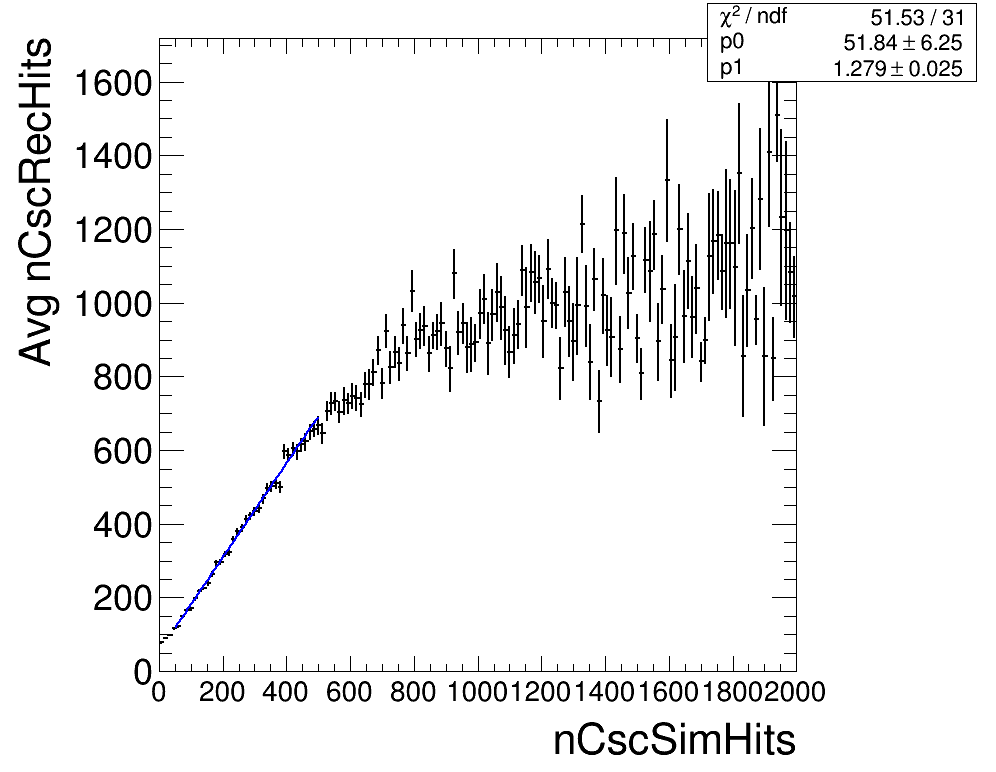

In [41]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
k = 'bbbb10m'
cond = gLLP_csc[k]
# cond = cscDetLayer_nCscSimHits[k]*0+cond
# cond = cond.flatten()
# h[k] = create_TH2D(np.column_stack((nCscWireDigis[k][cond],nCscRecHits[k][cond])), axis_title = ['nWireDigis','nCscRecHits','Events'], binning=[100,0,800,200,0,3000])
# h[k] = create_TH2D(np.column_stack((nCscStripDigis[k][cond],nCscRecHits[k][cond])), axis_title = ['nStripDigis','nCscRecHits','Events'], binning=[100,0,5000,200,0,3000])

# h[k] = create_TH2D(np.column_stack((nCscWireDigis[k][cond],nCscSimHits[k][cond])), axis_title = ['nWireDigis','nCscSimHits','Events'], binning=[100,0,800,250,0,3000])
# h[k] = create_TH2D(np.column_stack((nCscSimHits[k][cond >= 1],nCscStripDigis[k][cond >= 1])), axis_title = ['nCscSimHits','nStripDigis','Events'], binning=[100,0,5000,200,0,3000])

h[k] = create_TH2D(np.column_stack((nCscSimHits[k][cond >= 1],nCscRecHits[k][cond >= 1])), axis_title = ['nCscSimHits','nCscRecHits','Events'], binning=[150,0,2000,150,0,2000])
# h[k] = create_TH2D(np.column_stack((cscDetLayer_nCscSimHits[k].flatten()[cond>= 1 ], cscDetLayer_nCscRecHits[k].flatten()[cond >= 1 ])), axis_title = ['nCscSimHits','nCscRecHits','Events'], binning=[150,0,1000,150,0,600])

# h[k] = create_TH2D(np.column_stack((cscDetLayer_nCscSimHits[k].flatten()[cond >= 1 ], cscDetLayer_nWireDigis[k].flatten()[cond >= 1 ])), axis_title = ['nCscSimHits','nCscWireDigis','Events'], binning=[150,0,1000,100,0,100])
# h[k] = create_TH2D(np.column_stack((cscDetLayer_nCscSimHits[k].flatten()[cond >= 1 ], cscDetLayer_nStripDigis[k].flatten()[cond >= 1 ])), axis_title = ['nCscSimHits','nCscStripDigis','Events'], binning=[150,0,1000,100,0,100])



# h[k] = create_TH2D(np.column_stack((nCscRecHits[k][cond],nCscSimHits[k][cond])), axis_title = ['nCscRecHits','nCscSimHits','Events'], binning=[150,0,2000,150,0,2000])



# h[k] = create_TH2D(np.column_stack((nCscStripDigis[k][cond],nCscWireDigis[k][cond])), axis_title = ['nStripDigis','nWireDigis','Events'], binning=[150,0,5000,150,0,800])
h[k] = h[k].ProfileX("_pfx",1,-1,"")

r = h[k].Fit('pol1', 'LRSQ+', '', 50,500)
print(r.Get())
print(r.Prob())
h[k].GetFunction("pol1").SetLineColor(std_color_list[2])
h[k].GetFunction("pol1").SetLineWidth(2)

h[k].GetXaxis().SetLabelSize(0.04)
h[k].GetYaxis().SetTitle('Avg nCscRecHits')




h[k].SetLineColor(std_color_list[i])
# leg.AddEntry(h[k], k)
#     h[k].SetMaximum(10E5)
#     h[k].SetMinimum(1)
h[k].Draw('colz')
c.SetRightMargin(0.2)



# if setlog: 
c.SetLogz()
c.Draw()
print(time.time()-start_t)
# h[k].Delete()


# 2D plots per layer

In [ ]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
k = 'bbbb10m'


cond = gLLP_csc[k]
cond = cscDetLayer_nCscRecHits[k]*0+cond
cond = cond.flatten()
cond = (cond == 1)
# print(len(cond),np.count_nonzero(cond))
# print(len(cscDetLayer_nWireDigis[k].flatten()))
# h[k] = create_TH2D(np.column_stack((cscDetLayer_nWireDigis[k].flatten()[cond],cscDetLayer_nCscRecHits[k].flatten()[cond])), axis_title = ['nWireDigis','nCscRecHits','Events'], binning=[100,0,100,100,0,500])

# h[k] = create_TH2D(np.column_stack((cscDetLayer_nStripDigis[k].flatten()[cond],cscDetLayer_nCscRecHits[k].flatten()[cond])), axis_title = ['nStripDigis','nCscRecHits','Events'], binning=[50,0,100,50,0,100])


# h[k] = create_TH2D(np.column_stack((cscDetLayer_nWireDigis[k].flatten()[cond],cscDetLayer_nCscSimHits[k].flatten()[cond])), axis_title = ['nWireDigis','nCscSimHits','Events'], binning=[100,0,100,250,0,1000])
# h[k] = create_TH2D(np.column_stack((nCscStripDigis[k][cond],nCscSimHits[k][cond])), axis_title = ['nStripDigis','nCscSimHits','Events'], binning=[100,0,5000,200,0,3000])

h[k] = create_TH2D(np.column_stack((cscDetLayer_nCscRecHits[k].flatten()[cond],cscDetLayer_nCscSimHits[k].flatten()[cond])), axis_title = ['nCscRecHits','nCscSimHits','Events'], binning=[150,0,200,150,0,800])

print(np.unique(cscDetLayer_nStripDigis[k].flatten()[cond]))
print(np.unique(cscDetLayer_nWireDigis[k].flatten()[cond]))


# h[k] = create_TH2D(np.column_stack((nCscStripDigis[k][cond],nCscWireDigis[k][cond])), axis_title = ['nStripDigis','nWireDigis','Events'], binning=[150,0,5000,150,0,800])

h[k].GetXaxis().SetLabelSize(0.04)




h[k].SetLineColor(std_color_list[i])
# leg.AddEntry(h[k], k)
#     h[k].SetMaximum(10E5)
#     h[k].SetMinimum(1)
h[k].Draw('colz')
c.SetRightMargin(0.2)



# if setlog: 
c.SetLogz()
c.Draw()
print(time.time()-start_t)

# SimHit distribution per Layer

20
21
15
19
0
0
[139.24751 137.23349 137.27115 138.99098 138.90771 137.15454 142.48595
 143.86221 149.5309  146.94652 147.00357 148.71863 147.03104 146.97783
 146.92065 133.37749 140.882   141.11513 134.65558 134.87656]
[-530.8045  -531.1113  -530.9534  -528.7419  -528.76105 -526.53644
 -548.13464 -545.5549  -556.1927  -558.4537  -558.67346 -568.353
 -559.07477 -557.6948  -557.789   -522.0904  -546.69196 -546.5215
 -518.37134 -518.3311 ]
[490, -13.0, 11.5, 251, -40.0, 35.5]
141.65947 -541.9418 -922.9681
[[ 2.6142578 13.337219 ]] [[ 39.060913 405.22748 ]] [[ 47.24768 425.5171 ]]
20.0 20 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
CPU times: user 3.57 s, sys: 2.68 s, total: 6.25 s
Wall time: 6.23 s


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb10m (Potential memory leak).


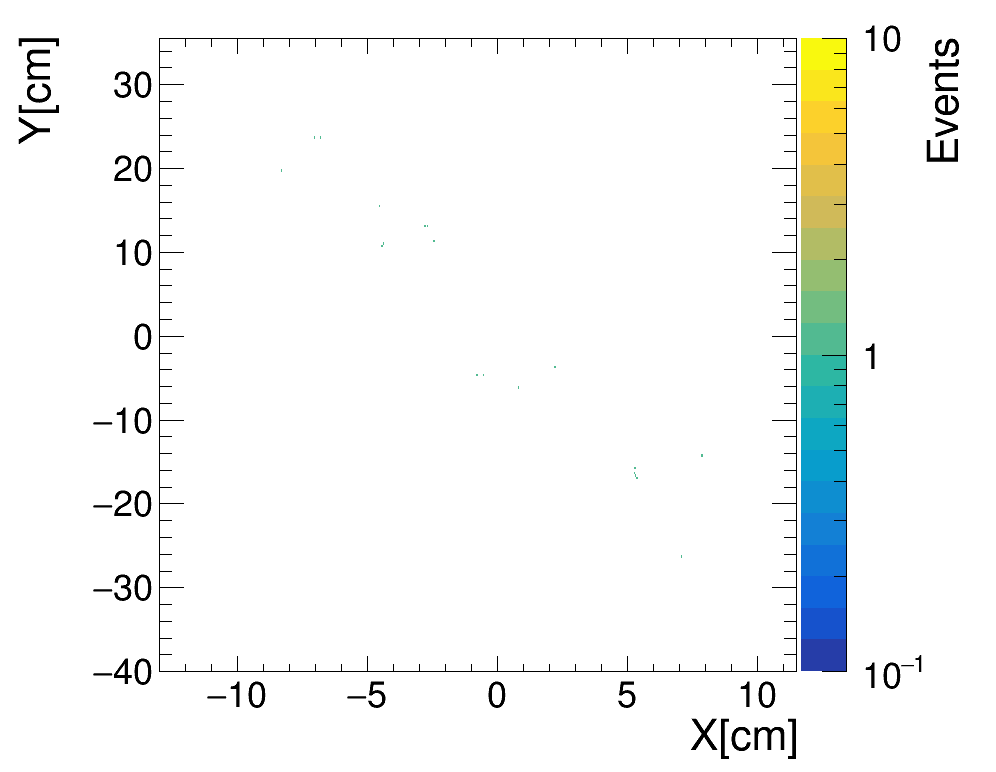

In [58]:
%%time
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

ev = 88785
detid = 604058214
ev = 134356  
detid = 604058858
#   22 12 403 647 1

#   26 20 177 125 1
#   17 0 64 70 1

ev_cond = eventNum[k] == ev
cond = cscSimHitsDetId[k][ev_cond] == detid+1
print(len(cscSimHitsX[k][ev_cond][cscSimHitsDetId[k][ev_cond] == detid+1][0]))
print(len(cscSimHitsX[k][ev_cond][cscSimHitsDetId[k][ev_cond] == detid+2][0]))
print(len(cscSimHitsX[k][ev_cond][cscSimHitsDetId[k][ev_cond] == detid+3][0]))
print(len(cscSimHitsX[k][ev_cond][cscSimHitsDetId[k][ev_cond] == detid-1][0]))
print(len(cscSimHitsX[k][ev_cond][cscSimHitsDetId[k][ev_cond] == detid-2][0]))
print(len(cscSimHitsX[k][ev_cond][cscSimHitsDetId[k][ev_cond] == detid-3][0]))



meanx = np.mean(cscSimHitsX[k][ev_cond][cond][0])
meany = np.mean(cscSimHitsY[k][ev_cond][cond][0])
meanz = np.mean(cscSimHitsZ[k][ev_cond][cond][0])

print(cscSimHitsX[k][ev_cond][cond][0])
print(cscSimHitsY[k][ev_cond][cond][0])
# print(cscSimHitsParticleType[k][ev_cond][cond][0])
# print(cscSimHitsX[k][ev_cond][cond][0][0]-meanx,cscSimHitsY[k][ev_cond][cond][0][0]-meany)
xmax = int(np.max(cscSimHitsX[k][ev_cond][cond][0])-meanx) * 1.5 +1
xmin = int(np.min(cscSimHitsX[k][ev_cond][cond][0])-meanx) * 1.5 -1
ymax = int(np.max(cscSimHitsY[k][ev_cond][cond][0])-meany) * 1.5 +1
ymin = int(np.min(cscSimHitsY[k][ev_cond][cond][0])-meany) * 1.5 -1
# xmax,xmin,ymax,ymin = 30,-30,20,-20

xnbin = (xmax-xmin)/0.05
ynbin = (ymax-ymin)/0.3
bins = [int(xnbin),xmin,xmax,int(ynbin),ymin,ymax]
print(bins)
print(meanx,meany,meanz)
print(gLLP_decay_vertex_x[k][ev_cond]-meanx, gLLP_decay_vertex_y[k][ev_cond]-meany, gLLP_decay_vertex_z[k][ev_cond]-meanz)
h[k] = create_TH2D(np.column_stack((cscSimHitsX[k][ev_cond][cond][0]-meanx,cscSimHitsY[k][ev_cond][cond][0]-meany)), axis_title = ['X[cm]','Y[cm]','Events'], binning=bins)

h[k].SetMinimum(.1)
h[k].SetMaximum(10)


h[k].Draw('colz')
c.SetLogz()
c.SetRightMargin(0.2)
c.Draw()

ll = []
for i in range(1,h[k].GetNbinsX() + 1):
    for j in range(1,h[k].GetNbinsY() + 1):
        temp = h[k].GetBinContent(i,j)
        if temp > 0:
            ll.append(temp)
print(sum(ll),len(ll),ll)
histo = create_TH1D( ll, axis_title=['nSimHits', 'Events'], name=k, binning=[int(max(ll)),0,int(max(ll))])

[490, -13.0, 11.5, 251, -40.0, 35.5]
141.65947 -541.9418 -922.9681
[[ 2.6142578 13.337219 ]] [[ 39.060913 405.22748 ]] [[ 47.24768 425.5171 ]]
[-78.8824    -76.30316   -74.19941    -7.184723   -1.6389618   2.8841248
  -4.611862    1.0366974   5.6436768  -1.5316925   4.2421417   8.950912 ]
9.0 9 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
CPU times: user 1.3 s, sys: 1.11 s, total: 2.41 s
Wall time: 2.4 s


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: bbbb10m (Potential memory leak).


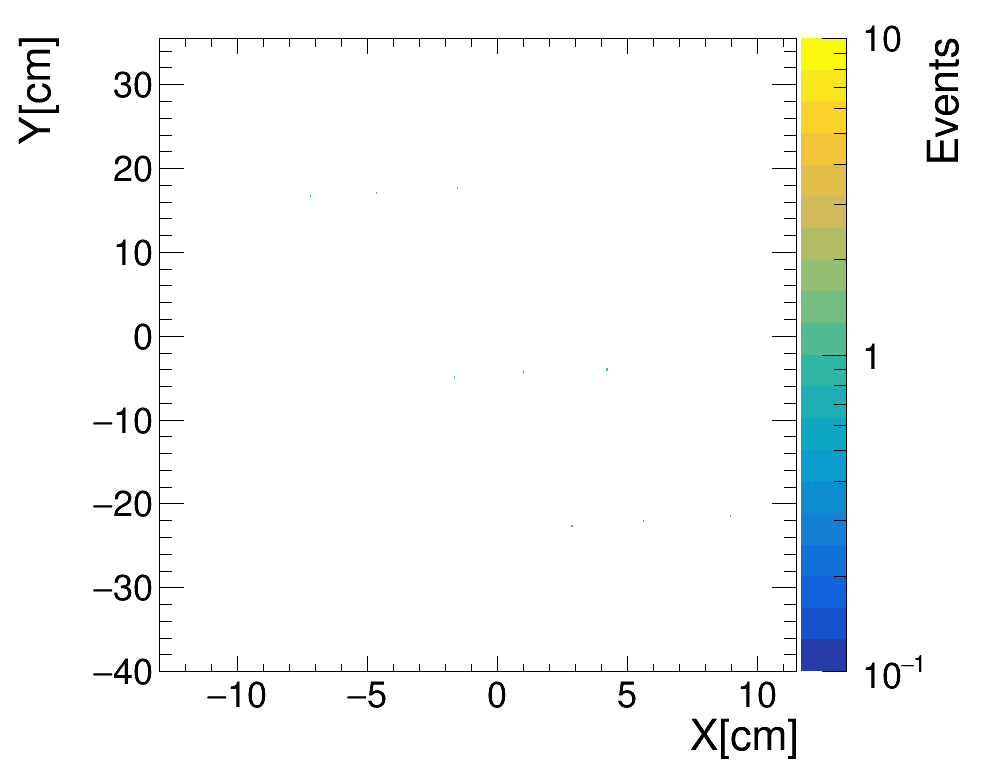

In [59]:
%%time
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

# ev = 17344  
# detid = 604021398

ev_cond = eventNum[k] == ev

cond = cscRecHitsDetId[k][ev_cond] == detid


# meanx = np.mean(cscRecHitsX[k][ev_cond][cond][0])
# meany = np.mean(cscRecHitsY[k][ev_cond][cond][0])
# meanz = np.mean(cscRecHitsZ[k][ev_cond][cond][0])


# print(cscSimHitsParticleType[k][ev_cond][cond][0])
# print(cscSimHitsX[k][ev_cond][cond][0][0]-meanx,cscSimHitsY[k][ev_cond][cond][0][0]-meany)
# xmax = int(np.max(cscRecHitsX[k][ev_cond][cond][0])-meanx) * 1.1
# xmin = int(np.min(cscRecHitsX[k][ev_cond][cond][0])-meanx) * 1.1
# ymax = int(np.max(cscRecHitsY[k][ev_cond][cond][0])-meany) * 1.5 +1
# ymin = int(np.min(cscRecHitsY[k][ev_cond][cond][0])-meany) * 1.5 -1
# xmax,xmin,ymax,ymin = 40,-40,40,-40

# xnbin = (xmax-xmin)
# ynbin = (ymax-ymin)
# bins = [int(xnbin),xmin,xmax,int(ynbin),ymin,ymax]
print(bins)
print(meanx,meany,meanz)
print(gLLP_decay_vertex_x[k][ev_cond]-meanx, gLLP_decay_vertex_y[k][ev_cond]-meany, gLLP_decay_vertex_z[k][ev_cond]-meanz)
h[k] = create_TH2D(np.column_stack((cscRecHitsX[k][ev_cond][cond][0]-meanx,cscRecHitsY[k][ev_cond][cond][0]-meany)), axis_title = ['X[cm]','Y[cm]','Events'], binning=bins)
print(cscRecHitsX[k][ev_cond][cond][0]-meanx)
h[k].SetMinimum(.1)
h[k].SetMaximum(10)


h[k].Draw('colz')
c.SetLogz()
c.SetRightMargin(0.2)
# rt.enableJSVis()
c.Draw()

ll = []
for i in range(1,h[k].GetNbinsX() + 1):
    for j in range(1,h[k].GetNbinsY() + 1):
        temp = h[k].GetBinContent(i,j)
        if temp > 0:
            ll.append(temp)
print(sum(ll),len(ll),ll)
histo = create_TH1D( ll, axis_title=['nSimHits', 'Events'], name=k, binning=[int(max(ll)),0,int(max(ll))])

# Occupancy plot

CPU times: user 470 µs, sys: 0 ns, total: 470 µs
Wall time: 479 µs


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


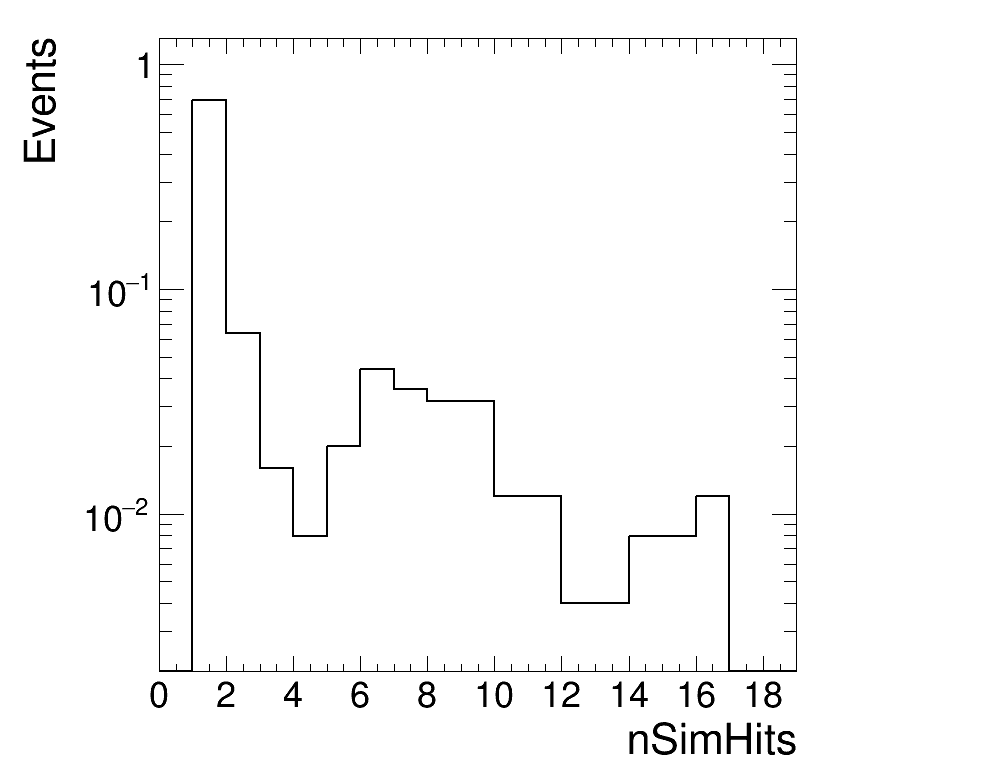

In [53]:
%%time
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)




histo.DrawNormalized('')
c.SetLogy()
c.SetRightMargin(0.2)
# rt.enableJSVis()
c.Draw()



# Occupancy per event

In [ ]:
avg_occupancy = []
max_occupancy = []
for i in range(len(eventNum[k])):
    if len(cscDetLayer_nCscSimHits[k][i]) == 0: continue
    max_index = np.argmax(cscDetLayer_nCscSimHits[k][i])

#     if cscDetLayer_nCscSimHits[k][i][max_index]>750 and gLLP_csc[k][i] == 1:
#         print(ev,cscDetLayer[k][i][max_index],cscDetLayer_nCscSimHits[k][i][max_index], nCscSimHits[k][i], gLLP_csc[k][i])

    cond = cscSimHitsDetId[k][ev_cond] == detid
    meanx = np.mean(cscSimHitsX[k][ev_cond][cond][0])
    meany = np.mean(cscSimHitsY[k][ev_cond][cond][0])
    meanz = np.mean(cscSimHitsZ[k][ev_cond][cond][0])

    xmax = int(np.max(cscSimHitsX[k][ev_cond][cond][0])-meanx) * 1.1
    xmin = int(np.min(cscSimHitsX[k][ev_cond][cond][0])-meanx) * 1.1
    ymax = int(np.max(cscSimHitsY[k][ev_cond][cond][0])-meany) * 1.5 +1
    ymin = int(np.min(cscSimHitsY[k][ev_cond][cond][0])-meany) * 1.5 -1
    # xmax,xmin,ymax,ymin = 20,-20,20,-20

    xnbin = (xmax-xmin)/0.05
    ynbin = (ymax-ymin)/0.3
    bins = [int(xnbin),xmin,xmax,int(ynbin),ymin,ymax]
#     print(bins)
#     print(meanx,meany,meanz)
#     print(gLLP_decay_vertex_x[k][ev_cond]-meanx, gLLP_decay_vertex_y[k][ev_cond]-meany, gLLP_decay_vertex_z[k][ev_cond]-meanz)
    h[k] = create_TH2D(np.column_stack((cscSimHitsX[k][ev_cond][cond][0]-meanx,cscSimHitsY[k][ev_cond][cond][0]-meany)), axis_title = ['X[cm]','Y[cm]','Events'], binning=bins)
    # print(cscSimHitsY[k][ev_cond][cond][0])


    ll = []
    for i in range(1,h[k].GetNbinsX() + 1):
        for j in range(1,h[k].GetNbinsY() + 1):
            temp = h[k].GetBinContent(i,j)
            if temp > 0:
                ll.append(temp)
    print(sum(ll),ll)
    histo = create_TH1D( ll, axis_title=['nSimHits', 'Events'], name=k, binning=[int(max(ll)),0,int(max(ll))])

# significance